# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [1]:
# Libraries
import numpy as np
import pandas as pd
import os

# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

In [43]:
# your code here
os.getcwd()
employees = pd.read_csv('/Users/vpavandijk/LEARNING/Ironhack/copy of google drive class AMS0520/Copy of Employee.csv')
employees

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [44]:
# Method 1
# your code here
mean_salary_department = employees.groupby('Department').Salary.agg('mean')
mean_salary_department

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [45]:
# Method 2
# your code here
employees.pivot_table(index=['Department'], values=['Salary'])

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [46]:
# your code here
employees.pivot_table(index=['Department'], columns=['Title'], values=['Salary'])

Salary                  
Title          VP analyst associate
Department                         
HR           70.0    32.5       NaN
IT           70.0    32.5      60.0
Sales         NaN     NaN      55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [47]:
# your code here
employees.pivot_table(index=['Department'], columns=['Title', 'Years'], values=['Salary'])

Salary                                          
Title          VP analyst             associate            
Years           8       1     2     4         2     3     7
Department                                                 
HR           70.0     NaN  30.0  35.0       NaN   NaN   NaN
IT           70.0    35.0  30.0   NaN       NaN   NaN  60.0
Sales         NaN     NaN   NaN   NaN      55.0  55.0   NaN

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [48]:
# your code here
employees.pivot_table(index=['Department'], columns=['Title'], values=['Salary'], aggfunc=[np.mean, 'count'])

mean                    count                  
           Salary                   Salary                  
Title          VP analyst associate     VP analyst associate
Department                                                  
HR           70.0    32.5       NaN    1.0     2.0       NaN
IT           70.0    32.5      60.0    1.0     2.0       1.0
Sales         NaN     NaN      55.0    NaN     NaN       2.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [53]:
# your code here
employees.pivot_table(index=['Department'], columns=['Title'], values=['Salary'], aggfunc=[min, 'median', max, 'std'])

min                   median                      max          \
           Salary                   Salary                   Salary           
Title          VP analyst associate     VP analyst associate     VP analyst   
Department                                                                    
HR           70.0    30.0       NaN   70.0    32.5       NaN   70.0    35.0   
IT           70.0    30.0      60.0   70.0    32.5      60.0   70.0    35.0   
Sales         NaN     NaN      55.0    NaN     NaN      55.0    NaN     NaN   

                           std            
                        Salary            
Title      associate   analyst associate  
Department                                
HR               NaN  3.535534       NaN  
IT              60.0  3.535534       NaN  
Sales           55.0       NaN       0.0

In [ ]:
"""
your commments here:

some fields are filled with NaN or not even calculated in the std part of the pivot table.
NaN are there because no data is available. The std values are not even calculated because a std cannot be calculated of one value.

"""

#### Based on your comments, fill the missing values with an appropriate value.

In [52]:
# your code here
employees.pivot_table(index=['Department'], columns=['Title'], values=['Salary'], aggfunc=[min, 'median', max, 'std'], fill_value=0)


min                   median                      max          \
           Salary                   Salary                   Salary           
Title          VP analyst associate     VP analyst associate     VP analyst   
Department                                                                    
HR             70      30         0     70    32.5         0     70      35   
IT             70      30        60     70    32.5        60     70      35   
Sales           0       0        55      0     0.0        55      0       0   

                           std            
                        Salary            
Title      associate   analyst associate  
Department                                
HR                 0  3.535534         0  
IT                60  3.535534         0  
Sales             55  0.000000         0

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [50]:
# your code here
employees.pivot_table(index=['Department'], values=['Salary'], aggfunc=['count', sum])


,count,sum
,Salary,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [55]:
# your code here
employees.pivot_table(index=['Department'], columns=['Title'], values=['Years', 'Salary'], aggfunc={'Years': sum, 'Salary': np.mean}, fill_value=0)


Salary                   Years                  
Title          VP analyst associate    VP analyst associate
Department                                                 
HR             70    32.5         0     8       6         0
IT             70    32.5        60     8       3         7
Sales           0     0.0        55     0       0         5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [100]:
# your code here
#not really sure what is needed here.....

salary_without_max = employees.groupby('Department')['Salary'].transform('max')
print(salary_without_max) # I saw this form Tiina but do not get it working as i would....

employees.pivot_table(index=['Department'], values=['Salary'], aggfunc=[np.mean, max])


0    70
1    70
2    70
3    70
4    55
5    55
6    70
7    70
8    70
Name: Salary, dtype: int64


,mean,max
,Salary,Salary
Department,,
HR,45.00,70
IT,48.75,70
Sales,55.00,55


# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [82]:
# your code here
fitbit = pd.read_csv('/Users/vpavandijk/LEARNING/Ironhack/copy of google drive class AMS0520/Copy of Fitbit2.csv')
pd.set_option('display.max_columns', None)
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,377,33,18,410,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,406,21,8,427,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,280,35,15,315,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,370,42,22,412,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [59]:
# your code here
fitbit.dtypes
fitbit.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Calorie burned,367.0,2741.501362,916.307036,179.000,2698.000000,2974.000000,3233.000000,4351.000000
Steps,367.0,10121.588556,5594.836225,0.000,6730.500000,10413.000000,13916.500000,26444.000000
Distance,367.0,8.549128,3.409881,0.000,6.155000,8.290000,10.560000,20.450000
Floors,367.0,11.724796,10.337370,0.000,5.000000,11.000000,16.000000,101.000000
Minutes Sedentary,367.0,563.934482,294.793145,1.002,520.000000,663.000000,756.500000,998.000000
Minutes Lightly Active,367.0,236.405995,86.531376,0.000,179.000000,226.000000,290.000000,472.000000
Minutes Fairly Active,367.0,26.163488,20.319456,0.000,8.000000,24.000000,41.500000,101.000000
Minutes Very Active,367.0,35.722071,31.006682,0.000,10.500000,29.000000,54.000000,153.000000
Activity Calories,367.0,2044.147139,2041.267168,0.000,1218.500000,1553.000000,1927.500000,9830.000000
MinutesOfSleep,367.0,290.479564,154.752328,0.000,224.000000,337.000000,400.500000,553.000000


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [61]:
# your code here
fitbit["Minutes Very Active"].corr(fitbit["Steps"])

0.5714518481062608

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [63]:
import matplotlib.pyplot as plt;

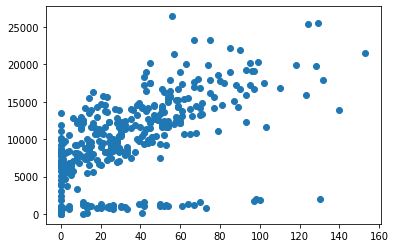

In [64]:

plt.scatter(x=fitbit["Minutes Very Active"], y=fitbit["Steps"])
# plt.title(#)
# plt.xlabel(#)
# plt.ylabel(#)
plt.show()


#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
your commments here:

overall there is a positive trend with higher minutes of very active and steps
"""

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [65]:
# your code here
fitbit["Minutes Sedentary"].corr(fitbit["Steps"])

0.07690608062990091

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

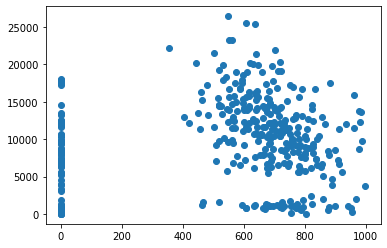

In [66]:
# your code here
plt.scatter(x=fitbit["Minutes Sedentary"], y=fitbit["Steps"])
# plt.title(#)
# plt.xlabel(#)
# plt.ylabel(#)
plt.show()


In [ ]:
"""
your commments here:
in this scatter plot i do not see a correlation between these two variables....
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [75]:
# your code here
fitbit["MinutesOfSleep"].corr(fitbit["Steps"])

0.1309856595083638

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

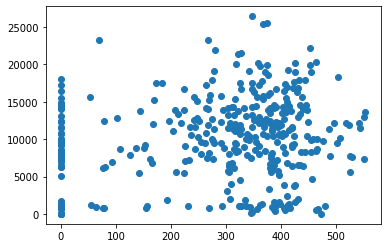

In [76]:
# your code here
plt.scatter(x=fitbit["MinutesOfSleep"], y=fitbit["Steps"])
# plt.title(#)
# plt.xlabel(#)
# plt.ylabel(#)
plt.show()


In [ ]:
"""
your commments here
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [77]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [80]:
# your code here
cor_fit = fitbit[columns]
cor_fit.corr()


,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [81]:
# your code here
cor_fit.corr().sort_values('Steps')

# so most correlated with Steps is Minutes Very Active, followd by Floors, then Calorie Burned, then MinutesOfSleep and last Minutes Sedentary

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986


# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [84]:
# your code here
time_grades = pd.read_csv('/Users/vpavandijk/LEARNING/Ironhack/copy of google drive class AMS0520/Copy of Time_Grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the `time_grades` dataset.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cea6490>,
      dtype=object)

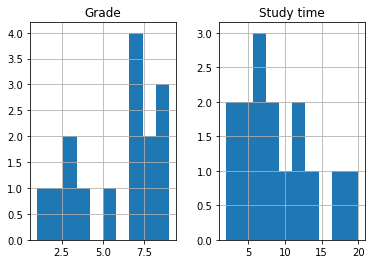

In [86]:
# your code here:
time_grades.hist()

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [92]:
# your code here
time_grades["Grade"].corr(time_grades["Study time"]) # standard is the Pearson correlation

time_grades["Grade"].corr(time_grades["Study time"], method='spearman')

0.819658753036942

In [ ]:
"""
your commments here

both correlation type show quite a high positive correlation, around 0.8
"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

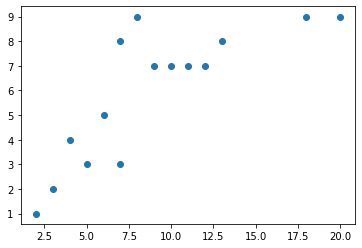

In [95]:
# your code here
plt.scatter(x=time_grades["Study time"], y=time_grades["Grade"])
# plt.title(#)
# plt.xlabel(#)
# plt.ylabel(#)
plt.show()

In [ ]:
"""
your commments here
also the scatter plot show a positive correclation between grade and study time
"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
your commments here
no....
"""